#Kavish Nag
#AIML B1
#24070126085


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
x=df[["TV","Radio","Newspaper"]]
y=df["Sales"]

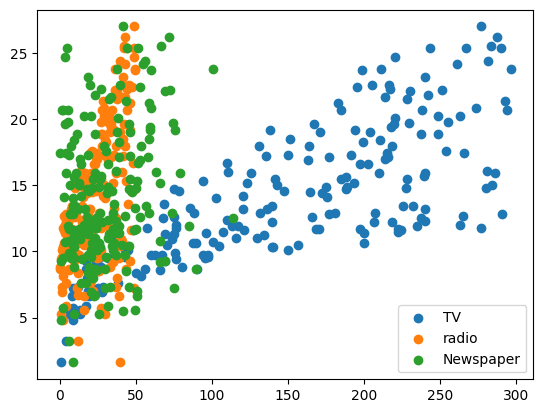

In [5]:
plt.scatter(df["TV"],y,label="TV")
plt.scatter(df["Radio"],y,label="radio")
plt.scatter(df["Newspaper"],y,label="Newspaper")
plt.legend(loc=4)



In [6]:
from sklearn.model_selection import train_test_split
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_,y_,test_size=.5,random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [8]:
model.fit(x_train,y_train)

LinearRegression()

In [9]:
print("Intercept: ", model.intercept_)
print("Coefficients: ")
list(zip(x_train, model.coef_))


Intercept:  2.7089490925159065
Coefficients: 


[('TV', np.float64(0.04405928095746522)),
 ('Radio', np.float64(0.19928749689893954)),
 ('Newspaper', np.float64(0.006882452222275487))]

In [10]:
y_val_pred=model.predict(x_val)

In [11]:
from sklearn.metrics import r2_score
r2_score(y_val,y_val_pred)

0.9144559242004047

In [12]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,y_val_pred)

2.549038568717417

In [13]:
y_pred=model.predict(x_test)

In [14]:
r2_score(y_pred,y_test)

0.7763801468793241

In [15]:
mean_squared_error(y_pred,y_test)

5.044555904713023

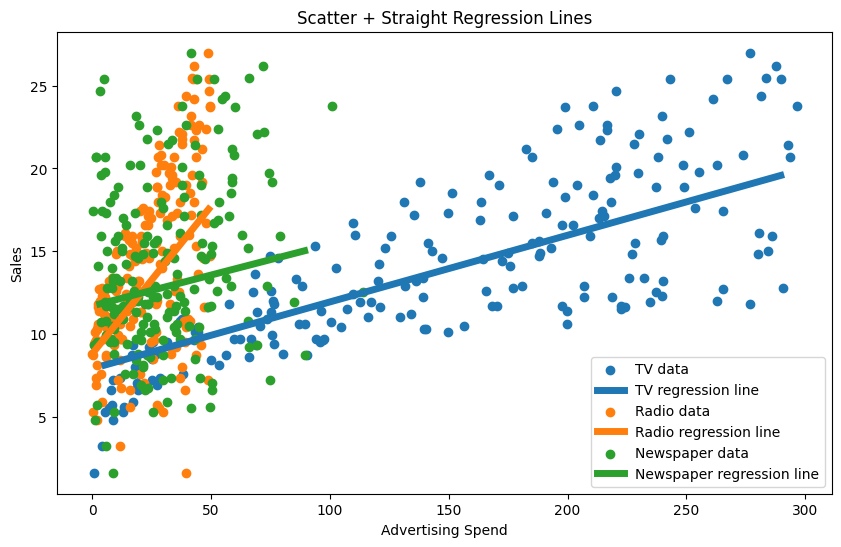

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

features = ["TV", "Radio", "Newspaper"]

for col in features:
    # scatter actual values
    plt.scatter(x[col], y, label=f"{col} data")

    # line using y_pred only (best-fit straight line)
    m, c = np.polyfit(x_test[col], y_pred, 1)

    x_line = np.linspace(x_test[col].min(), x_test[col].max(), 100)
    y_line = m * x_line + c

    plt.plot(x_line, y_line, label=f"{col} regression line",linewidth=5)

plt.xlabel("Advertising Spend")
plt.ylabel("Sales")
plt.title("Scatter + Straight Regression Lines")
plt.legend()
plt.show()
